**Import all necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('fast')
!pip install missingno
import missingno as msngno 
%matplotlib inline
import ast
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

**Loading the dataset, Train and Test
I have also added additional features from an external source (both test and train)

**Note: When the data is in the local machine, it is easier to load. The data was however loaded through GitHub link and it might take a while :)


In [3]:
url_train = 'https://raw.githubusercontent.com/harshvr15/TMDB_BoxOffice_Prediction/main/train.csv'
url_test = 'https://raw.githubusercontent.com/harshvr15/TMDB_BoxOffice_Prediction/main/test.csv'
    
url_train_add_features = 'https://raw.githubusercontent.com/harshvr15/TMDB_BoxOffice_Prediction/main/TrainAdditionalFeatures.csv'    
url_test_add_features = 'https://raw.githubusercontent.com/harshvr15/TMDB_BoxOffice_Prediction/main/TestAdditionalFeatures.csv'

train = pd.read_csv(url_train, index_col = 0)
test = pd.read_csv(url_test, index_col = 0)

train_extra = pd.read_csv(url_train_add_features)
test_extra = pd.read_csv(url_test_add_features, index_col = 0)

train = pd.merge(train, train_extra, how='left', on=['imdb_id'])
test = pd.merge(test, test_extra, how='left', on=['imdb_id'])



#train = pd.read_csv('train.csv')
#test = pd.read_csv('test.csv')

#train_extra = pd.read_csv('TrainAdditionalFeatures.csv')
#test_extra = pd.read_csv('TestAdditionalFeatures.csv')

#train = pd.merge(train, train_extra, how='left', on=['imdb_id'])
#test = pd.merge(test, test_extra, how='left', on=['imdb_id'])

In [4]:
train.shape, test.shape

((3000, 26), (4398, 25))

In [5]:
train_extra.shape, test_extra.shape

((2887, 4), (4232, 4))

**Checking the duplicates

In [6]:
sum(train.duplicated()), sum(test.duplicated())

(0, 0)

**Fixing the values that were missing/wrong for the complete dataset
These were pre-released in the discussion section

In [6]:
train.loc[train['id'] == 16,'revenue'] = 192864          # Skinning
train.loc[train['id'] == 90,'budget'] = 30000000         # Sommersby          
train.loc[train['id'] == 118,'budget'] = 60000000        # Wild Hogs
train.loc[train['id'] == 149,'budget'] = 18000000        # Beethoven
train.loc[train['id'] == 313,'revenue'] = 12000000       # The Cookout 
train.loc[train['id'] == 451,'revenue'] = 12000000       # Chasing Liberty
train.loc[train['id'] == 464,'budget'] = 20000000        # Parenthood
train.loc[train['id'] == 470,'budget'] = 13000000        # The Karate Kid, Part II
train.loc[train['id'] == 513,'budget'] = 930000          # From Prada to Nada
train.loc[train['id'] == 797,'budget'] = 8000000         # Welcome to Dongmakgol
train.loc[train['id'] == 819,'budget'] = 90000000        # Alvin and the Chipmunks: The Road Chip
train.loc[train['id'] == 850,'budget'] = 90000000        # Modern Times
train.loc[train['id'] == 1007,'budget'] = 2              # Zyzzyx Road 
train.loc[train['id'] == 1112,'budget'] = 7500000        # An Officer and a Gentleman
train.loc[train['id'] == 1131,'budget'] = 4300000        # Smokey and the Bandit   
train.loc[train['id'] == 1359,'budget'] = 10000000       # Stir Crazy 
train.loc[train['id'] == 1542,'budget'] = 1              # All at Once
train.loc[train['id'] == 1570,'budget'] = 15800000       # Crocodile Dundee II
train.loc[train['id'] == 1571,'budget'] = 4000000        # Lady and the Tramp
train.loc[train['id'] == 1714,'budget'] = 46000000       # The Recruit
train.loc[train['id'] == 1721,'budget'] = 17500000       # Cocoon
train.loc[train['id'] == 1865,'revenue'] = 25000000      # Scooby-Doo 2: Monsters Unleashed
train.loc[train['id'] == 1885,'budget'] = 12             # In the Cut
train.loc[train['id'] == 2091,'budget'] = 10             # Deadfall
train.loc[train['id'] == 2268,'budget'] = 17500000       # Madea Goes to Jail budget
train.loc[train['id'] == 2491,'budget'] = 6              # Never Talk to Strangers
train.loc[train['id'] == 2602,'budget'] = 31000000       # Mr. Holland's Opus
train.loc[train['id'] == 2612,'budget'] = 15000000       # Field of Dreams
train.loc[train['id'] == 2696,'budget'] = 10000000       # Nurse 3-D
train.loc[train['id'] == 2801,'budget'] = 10000000       # Fracture
train.loc[train['id'] == 335,'budget'] = 2 
train.loc[train['id'] == 348,'budget'] = 12
train.loc[train['id'] == 470,'budget'] = 13000000 
train.loc[train['id'] == 513,'budget'] = 1100000
train.loc[train['id'] == 640,'budget'] = 6 
train.loc[train['id'] == 696,'budget'] = 1
train.loc[train['id'] == 797,'budget'] = 8000000 
train.loc[train['id'] == 850,'budget'] = 1500000
train.loc[train['id'] == 1199,'budget'] = 5 
train.loc[train['id'] == 1282,'budget'] = 9               # Death at a Funeral
train.loc[train['id'] == 1347,'budget'] = 1
train.loc[train['id'] == 1755,'budget'] = 2
train.loc[train['id'] == 1801,'budget'] = 5
train.loc[train['id'] == 1918,'budget'] = 592 
train.loc[train['id'] == 2033,'budget'] = 4
train.loc[train['id'] == 2118,'budget'] = 344 
train.loc[train['id'] == 2252,'budget'] = 130
train.loc[train['id'] == 2256,'budget'] = 1 
train.loc[train['id'] == 2696,'budget'] = 10000000


test.loc[test['id'] == 6733,'budget'] = 5000000
test.loc[test['id'] == 3889,'budget'] = 15000000
test.loc[test['id'] == 6683,'budget'] = 50000000
test.loc[test['id'] == 5704,'budget'] = 4300000
test.loc[test['id'] == 6109,'budget'] = 281756
test.loc[test['id'] == 7242,'budget'] = 10000000
test.loc[test['id'] == 7021,'budget'] = 17540562       #  Two Is a Family
test.loc[test['id'] == 5591,'budget'] = 4000000        # The Orphanage
test.loc[test['id'] == 4282,'budget'] = 20000000       # Big Top Pee-wee
test.loc[test['id'] == 3033,'budget'] = 250 
test.loc[test['id'] == 3051,'budget'] = 50
test.loc[test['id'] == 3084,'budget'] = 337
test.loc[test['id'] == 3224,'budget'] = 4  
test.loc[test['id'] == 3594,'budget'] = 25  
test.loc[test['id'] == 3619,'budget'] = 500  
test.loc[test['id'] == 3831,'budget'] = 3  
test.loc[test['id'] == 3935,'budget'] = 500  
test.loc[test['id'] == 4049,'budget'] = 995946 
test.loc[test['id'] == 4424,'budget'] = 3  
test.loc[test['id'] == 4460,'budget'] = 8  
test.loc[test['id'] == 4555,'budget'] = 1200000 
test.loc[test['id'] == 4624,'budget'] = 30 
test.loc[test['id'] == 4645,'budget'] = 500 
test.loc[test['id'] == 4709,'budget'] = 450 
test.loc[test['id'] == 4839,'budget'] = 7
test.loc[test['id'] == 3125,'budget'] = 25 
test.loc[test['id'] == 3142,'budget'] = 1
test.loc[test['id'] == 3201,'budget'] = 450
test.loc[test['id'] == 3222,'budget'] = 6
test.loc[test['id'] == 3545,'budget'] = 38
test.loc[test['id'] == 3670,'budget'] = 18
test.loc[test['id'] == 3792,'budget'] = 19
test.loc[test['id'] == 3881,'budget'] = 7
test.loc[test['id'] == 3969,'budget'] = 400
test.loc[test['id'] == 4196,'budget'] = 6
test.loc[test['id'] == 4221,'budget'] = 11
test.loc[test['id'] == 4222,'budget'] = 500
test.loc[test['id'] == 4285,'budget'] = 11
test.loc[test['id'] == 4319,'budget'] = 1
test.loc[test['id'] == 4639,'budget'] = 10
test.loc[test['id'] == 4719,'budget'] = 45
test.loc[test['id'] == 4822,'budget'] = 22
test.loc[test['id'] == 4829,'budget'] = 20
test.loc[test['id'] == 4969,'budget'] = 20
test.loc[test['id'] == 5021,'budget'] = 40 
test.loc[test['id'] == 5035,'budget'] = 1 
test.loc[test['id'] == 5063,'budget'] = 14 
test.loc[test['id'] == 5119,'budget'] = 2 
test.loc[test['id'] == 5214,'budget'] = 30 
test.loc[test['id'] == 5221,'budget'] = 50 
test.loc[test['id'] == 4903,'budget'] = 15
test.loc[test['id'] == 4983,'budget'] = 3
test.loc[test['id'] == 5102,'budget'] = 28
test.loc[test['id'] == 5217,'budget'] = 75
test.loc[test['id'] == 5224,'budget'] = 3 
test.loc[test['id'] == 5469,'budget'] = 20 
test.loc[test['id'] == 5840,'budget'] = 1 
test.loc[test['id'] == 5960,'budget'] = 30
test.loc[test['id'] == 6506,'budget'] = 11 
test.loc[test['id'] == 6553,'budget'] = 280
test.loc[test['id'] == 6561,'budget'] = 7
test.loc[test['id'] == 6582,'budget'] = 218
test.loc[test['id'] == 6638,'budget'] = 5
test.loc[test['id'] == 6749,'budget'] = 8 
test.loc[test['id'] == 6759,'budget'] = 50 
test.loc[test['id'] == 6856,'budget'] = 10
test.loc[test['id'] == 6858,'budget'] =  100
test.loc[test['id'] == 6876,'budget'] =  250
test.loc[test['id'] == 6972,'budget'] = 1
test.loc[test['id'] == 7079,'budget'] = 8000000
test.loc[test['id'] == 7150,'budget'] = 118
test.loc[test['id'] == 6506,'budget'] = 118
test.loc[test['id'] == 7225,'budget'] = 6
test.loc[test['id'] == 7231,'budget'] = 85
test.loc[test['id'] == 5222,'budget'] = 5
test.loc[test['id'] == 5322,'budget'] = 90
test.loc[test['id'] == 5350,'budget'] = 70
test.loc[test['id'] == 5378,'budget'] = 10
test.loc[test['id'] == 5545,'budget'] = 80
test.loc[test['id'] == 5810,'budget'] = 8
test.loc[test['id'] == 5926,'budget'] = 300
test.loc[test['id'] == 5927,'budget'] = 4
test.loc[test['id'] == 5986,'budget'] = 1
test.loc[test['id'] == 6053,'budget'] = 20
test.loc[test['id'] == 6104,'budget'] = 1
test.loc[test['id'] == 6130,'budget'] = 30
test.loc[test['id'] == 6301,'budget'] = 150
test.loc[test['id'] == 6276,'budget'] = 100
test.loc[test['id'] == 6473,'budget'] = 100
test.loc[test['id'] == 6842,'budget'] = 30

**Checking for null values for both train and test dataset**

In [5]:
train.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
popularity2               118
rating                    118
totalVotes                118
dtype: int64

In [6]:
test.isna().sum()

id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
poster_path                 1
production_companies      258
production_countries      102
release_date                1
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       3
Keywords                  393
cast                       13
crew                       22
popularity2               179
rating                    179
totalVotes                179
dtype: int64

**Plotting the missing values to get a clear picture of how many variables have missing values

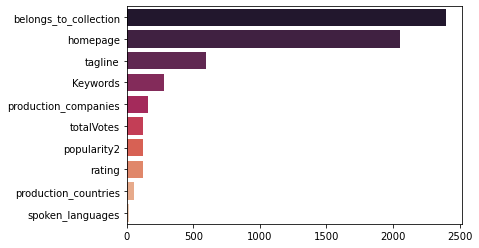

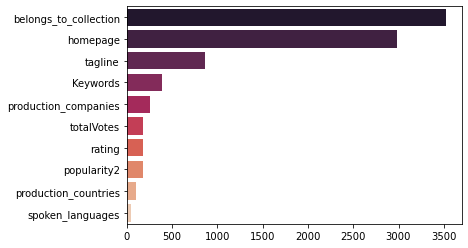

In [7]:
missing_values=train.isna().sum().sort_values(ascending=False)
sns.barplot(missing_values[:10],missing_values[:10].index,palette="rocket")
plt.show()

missing_values1=test.isna().sum().sort_values(ascending=False)
sns.barplot(missing_values1[:10],missing_values1[:10].index,palette="rocket")
plt.show()

**Mapping the plot for the number of non missing values 

<AxesSubplot:>

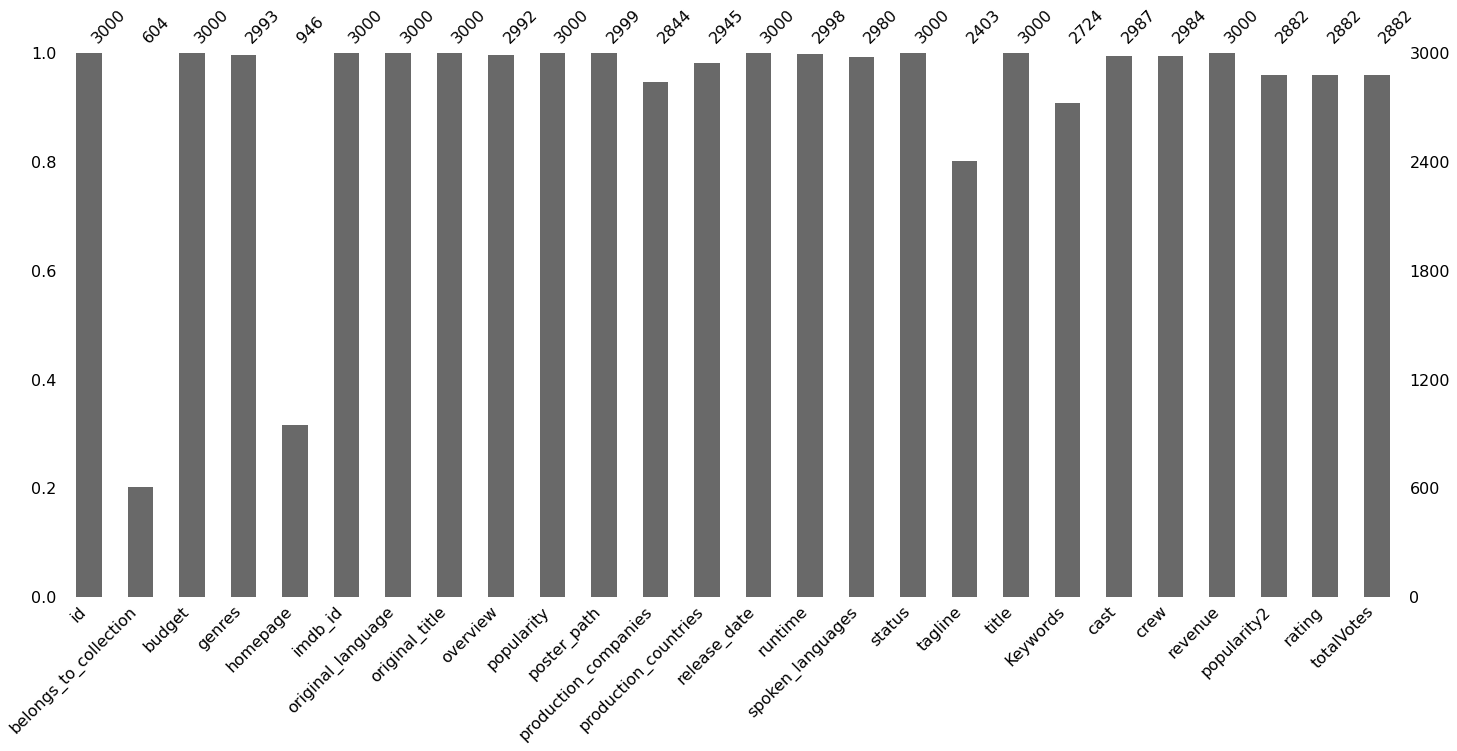

In [8]:
msngno.bar(train)

**Visualising correlation between missing values in different columns
(might be missing values in the same row)

<AxesSubplot:>

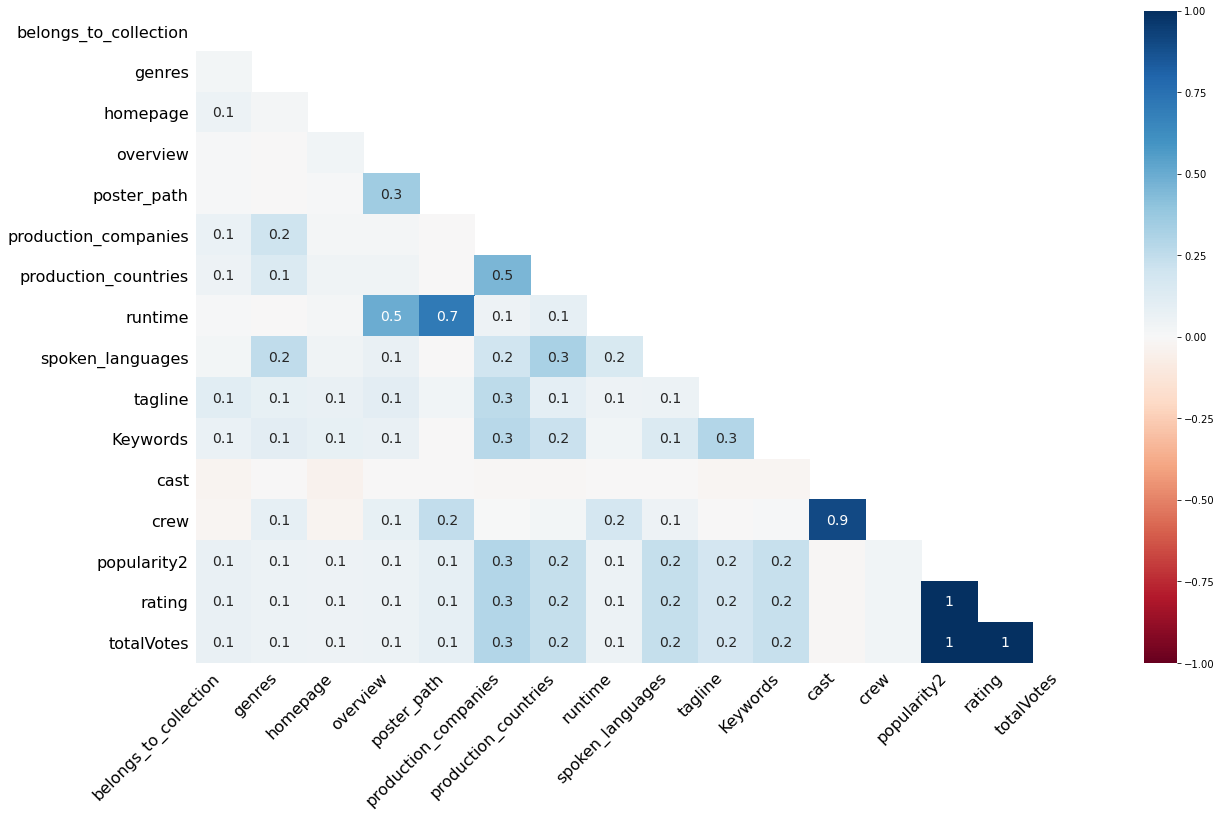

In [9]:
msngno.heatmap(train)

In [10]:
train.describe()

,id,budget,popularity,runtime,revenue,popularity2,rating,totalVotes
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03,2882.000000,2882.000000,2882.000000
mean,1500.500000,2.266135e+07,8.463274,107.856571,6.668176e+07,8.029303,6.366308,933.938584
std,866.169729,3.702662e+07,12.104000,22.086434,1.375149e+08,4.959153,0.887465,1795.101380
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00,0.600000,1.000000,1.000000
25%,750.750000,0.000000e+00,4.018053,94.000000,2.401550e+06,5.046250,5.800000,82.000000
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07,7.503500,6.400000,292.500000
75%,2250.250000,3.000000e+07,10.890983,118.000000,6.877599e+07,9.987000,7.000000,900.500000
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09,45.153000,9.000000,18931.000000


**Various columns in the are in JSON format, converting it to dictionary

In [7]:
dict_columns = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def text_to_dict(df):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x) )
    return df
        
train = text_to_dict(train)
test = text_to_dict(test)

**List out the different values in the columns
These columns were all in JSON format and to have a clear picture I needed to look through the details of what information each column has that will be used for our modelling phase

In [12]:
for count,value in enumerate(train['belongs_to_collection'][:2]):
    print(count,value)

for count,value in enumerate(test['genres'][:2]):
    print(count,value)
    
for count,value in enumerate(train['genres'][:2]):
    print(count,value)
    
for count,value in enumerate(train['spoken_languages'][:2]):
    print(count,value)
    
for count,value in enumerate(train['Keywords'][:2]):
    print(count,value)
    
for count,value in enumerate(train['production_countries'][:2]):
    print(count,value)
    
for count,value in enumerate(train['production_companies'][:2]):
    print(count,value)
    
for count,value in enumerate(train['cast'][:2]):
    print(count,value)
    
for count,value in enumerate(train['crew'][:2]):
    print(count,value)

0 [{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]
1 [{'id': 107674, 'name': 'The Princess Diaries Collection', 'poster_path': '/wt5AMbxPTS4Kfjx7Fgm149qPfZl.jpg', 'backdrop_path': '/zSEtYD77pKRJlUPx34BJgUG9v1c.jpg'}]
0 [{'id': 12, 'name': 'Adventure'}, {'id': 16, 'name': 'Animation'}, {'id': 10751, 'name': 'Family'}, {'id': 14, 'name': 'Fantasy'}]
1 [{'id': 27, 'name': 'Horror'}, {'id': 878, 'name': 'Science Fiction'}]
0 [{'id': 35, 'name': 'Comedy'}]
1 [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]
0 [{'iso_639_1': 'en', 'name': 'English'}]
1 [{'iso_639_1': 'en', 'name': 'English'}]
0 [{'id': 4379, 'name': 'time travel'}, {'id': 9663, 'name': 'sequel'}, {'id': 11830, 'name': 'hot tub'}, {'id': 179431, 'name': 'duringcreditsstinger'}]
1 [{'id': 2505, 'name': 'coronation'}, {'id': 4263, 'name': 

**The release date column was in an unstructured format and to analyse the data and it's features, I have dissolved the column in three seperate columns giving the year,month and day respectively.

In [8]:
train['release_year']=pd.to_datetime(train['release_date']).dt.year
train['release_month']=pd.to_datetime(train['release_date']).dt.month
train['release_day']=pd.to_datetime(train['release_date']).dt.dayofweek


test['release_year']=pd.to_datetime(test['release_date']).dt.year
test['release_month']=pd.to_datetime(test['release_date']).dt.month
test['release_day']=pd.to_datetime(test['release_date']).dt.dayofweek


**Imputing the missing values for Rating, TotalVotes, and Runtime by the average values in the dataset
NOTE: The votes can't be in decimal hence I have rounded it upto the nearest integer.

In [9]:
train['rating']=train['rating'].fillna(train['rating'].mean())
test['rating']=test['rating'].fillna(test['rating'].mean())

train['totalVotes']=train['totalVotes'].fillna(train['totalVotes'].mean())
train['totalVotes']=train['totalVotes'].round()
test['totalVotes']=test['totalVotes'].fillna(test['totalVotes'].mean())
test['totalVotes']=test['totalVotes'].round()

train['runtime']=train['runtime'].fillna(train['runtime'].mean())
test['runtime']=test['runtime'].fillna(test['runtime'].mean())

In [15]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,Keywords,cast,crew,revenue,popularity2,rating,totalVotes,release_year,release_month,release_day
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,10.400,5.000000,482.0,2015,2,4
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,15.229,6.400000,1528.0,2004,8,4
2,3,{},3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,26.082,8.400000,7314.0,2014,10,4
3,4,{},1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,5.531,7.500000,115.0,2012,3,4
4,5,{},0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,{},"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,NaN,6.366308,934.0,2009,2,3


**Extracting the required data from the converted dictionary columns 

In [10]:
train['numberofgenres']=train['genres'].apply(lambda x: len(x) if x != {} else 0)
train['nameofcollection'] = train['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else 0)
train['genres_info'] = train['genres'].apply(lambda x: x[0]['name'] if x != {} else 0)
train['language'] = train['spoken_languages'].apply(lambda x: x[0]['name'] if x != {} else 0)
train['production_country'] = train['production_countries'].apply(lambda x: x[0]['name'] if x != {} else 0)
train['production_company'] = train['production_companies'].apply(lambda x: x[0]['name'] if x != {} else 0)

In [11]:
test['numberofgenres']=train['genres'].apply(lambda x: len(x) if x != {} else 0)
test['numberofgenres']=test['numberofgenres'].replace(np.nan,0)
test['nameofcollection'] = test['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else 0)
test['genres_info'] = test['genres'].apply(lambda x: x[0]['name'] if x != {} else 0)
test['language'] = test['spoken_languages'].apply(lambda x: x[0]['name'] if x != {} else 0)
test['production_country'] = test['production_countries'].apply(lambda x: x[0]['name'] if x != {} else 0)
test['production_company'] = test['production_companies'].apply(lambda x: x[0]['name'] if x != {} else 0)

**Exploring skewness of the Budget

<AxesSubplot:xlabel='budget', ylabel='Density'>

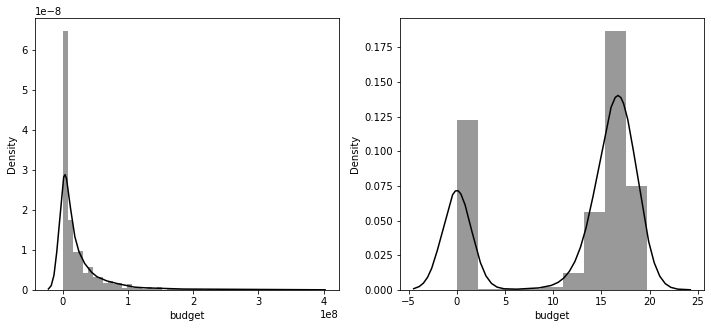

In [18]:
train = train.astype({"budget":'Int32',})
fig, ax = plt.subplots(1,2,figsize=(12,5))
sns.distplot(train['budget'],ax=ax[0],color='black')
sns.distplot(np.log1p(train['budget']),ax=ax[1],color='black')


**Exploring the skewness of the target variable "Revenue"

<AxesSubplot:xlabel='revenue', ylabel='Density'>

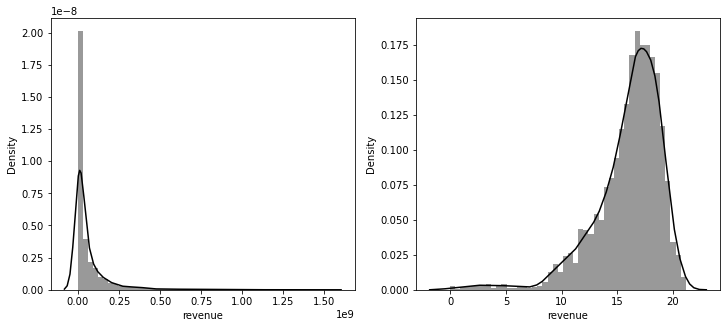

In [19]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
sns.distplot(train['revenue'],ax=ax[0],color='black')
sns.distplot(np.log(train['revenue']),ax=ax[1],color='black')


**Feature Engineering (Test and Train)

In [12]:
train['lang_english']=0
train.loc[train['original_language'].astype(str)=="en","lang_english"]=1

train['bud_runtime']=(train['budget']+1)/(train['runtime']+1)

train['bud_year']=(train['budget']+1)/(train['release_year']+1)

train['bud_popularity']=(train['budget']+1)/(train['popularity']+1)

train['runtime_year']=(train['runtime']+1)/(train['release_year']+1)

train['popularity_year']=(train['popularity']+1)/(train['release_year']+1)

In [13]:
test['lang_english']=0
test.loc[test['original_language'].astype(str)=="en","lang_english"]=1

test['bud_runtime']=(test['budget']+1)/(test['runtime']+1)

test['bud_year']=(test['budget']+1)/(test['release_year']+1)

test['bud_popularity']=(test['budget']+1)/(test['popularity']+1)

test['runtime_year']=(test['runtime']+1)/(test['release_year']+1)

test['popularity_year']=(test['popularity']+1)/(test['release_year']+1)

**Encoding of some variables as per our requirement (Train and Test)

In [14]:
train['homepage'] = train['homepage'].fillna(0)
train['homepage'] = train['homepage'].apply(lambda x: 0 if x==0 else 1)

train['overview'] = train['overview'].fillna(0)
train['overview'] = train['overview'].apply(lambda x: 0 if x==0 else 1)

train['poster_path'] = train['poster_path'].fillna(0)
train['poster_path'] = train['poster_path'].apply(lambda x: 0 if x==0 else 1)

train['tagline'] = train['tagline'].fillna(0)
train['tagline'] = train['tagline'].apply(lambda x: 0 if x==0 else 1)


In [15]:
test['homepage'] = test['homepage'].fillna(0)
test['homepage'] = test['homepage'].apply(lambda x: 0 if x==0 else 1)

test['overview'] = test['overview'].fillna(0)
test['overview'] = test['overview'].apply(lambda x: 0 if x==0 else 1)

test['poster_path'] = test['overview'].fillna(0)
test['poster_path'] = test['poster_path'].apply(lambda x: 0 if x==0 else 1)

test['tagline'] = test['tagline'].fillna(0)
test['tagline'] = test['tagline'].apply(lambda x: 0 if x==0 else 1)

In [24]:
train.isna().sum()

id                         0
belongs_to_collection      0
budget                     0
genres                     0
homepage                   0
imdb_id                    0
original_language          0
original_title             0
overview                   0
popularity                 0
poster_path                0
production_companies       0
production_countries       0
release_date               0
runtime                    0
spoken_languages           0
status                     0
tagline                    0
title                      0
Keywords                   0
cast                       0
crew                       0
revenue                    0
popularity2              118
rating                     0
totalVotes                 0
release_year               0
release_month              0
release_day                0
numberofgenres             0
nameofcollection           0
genres_info                0
language                   0
production_country         0
production_com

In [25]:
test.isna().sum()

id                         0
belongs_to_collection      0
budget                     0
genres                     0
homepage                   0
imdb_id                    0
original_language          0
original_title             0
overview                   0
popularity                 0
poster_path                0
production_companies       0
production_countries       0
release_date               1
runtime                    0
spoken_languages           0
status                     2
tagline                    0
title                      3
Keywords                   0
cast                       0
crew                       0
popularity2              179
rating                     0
totalVotes                 0
release_year               1
release_month              1
release_day                1
numberofgenres             0
nameofcollection           0
genres_info                0
language                   0
production_country         0
production_company         0
lang_english  

**There were few missing values in the test as seen above in the dates section
Imputing year,month and day by the Mode and the continuous variables by the Mean

In [16]:
test['release_year']=test['release_year'].fillna(test['release_year'].mode()[0])
test['release_month']=test['release_month'].fillna(test['release_month'].mode()[0])
test['release_day']=test['release_day'].fillna(test['release_day'].mode()[0])

test['bud_year']=test['bud_year'].fillna(test['bud_year'].mean())

test['popularity_year']=test['popularity_year'].fillna(test['popularity_year'].mean())

test['runtime_year']=test['runtime_year'].fillna(test['runtime_year'].mean())

**Release Year VS Revenue

Text(0.5, 1.0, 'Release Year vs Revenue')

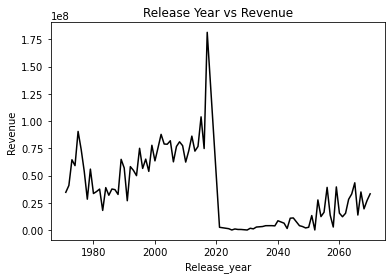

In [27]:
train.groupby('release_year')['revenue'].mean().plot(color='black')
plt.xlabel('Release_year',fontsize = 10)
plt.ylabel('Revenue',fontsize = 10);
plt.title("Release Year vs Revenue")

**We have revenue for the movies upto 2060!! Fishy :)

In [17]:
train =train.loc[(train['release_year']<=2020)]

Text(0.5, 1.0, 'Release Year vs Revenue')

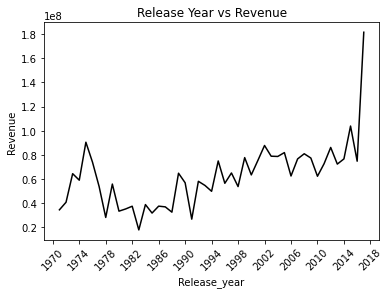

In [29]:
train.groupby('release_year')['revenue'].mean().plot(color='black')
plt.xticks(np.arange(1970,2020,4),rotation=45)
plt.xlabel('Release_year',fontsize = 10)
plt.ylabel('Revenue',fontsize = 10);
plt.title("Release Year vs Revenue")

**Release Month VS Revenue

Text(0.5, 1.0, 'Release Month vs Revenue')

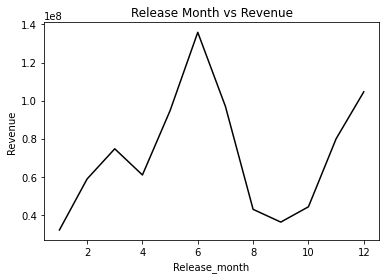

In [30]:
train.groupby('release_month')['revenue'].mean().plot(color='black')
plt.xlabel('Release_month',fontsize = 10)
plt.ylabel('Revenue',fontsize = 10)
plt.title("Release Month vs Revenue")

**Release Day VS Revenue

Text(0.5, 1.0, 'Release Day vs Revenue')

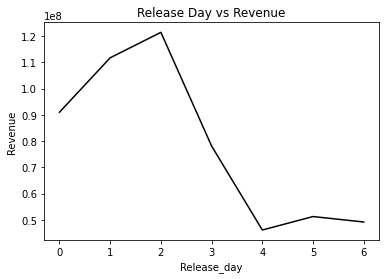

In [31]:
train.groupby('release_day')['revenue'].mean().plot(color='black')
plt.xlabel('Release_day',fontsize = 10)
plt.ylabel('Revenue',fontsize = 10)
plt.title("Release Day vs Revenue")

**Movie Released VS Year

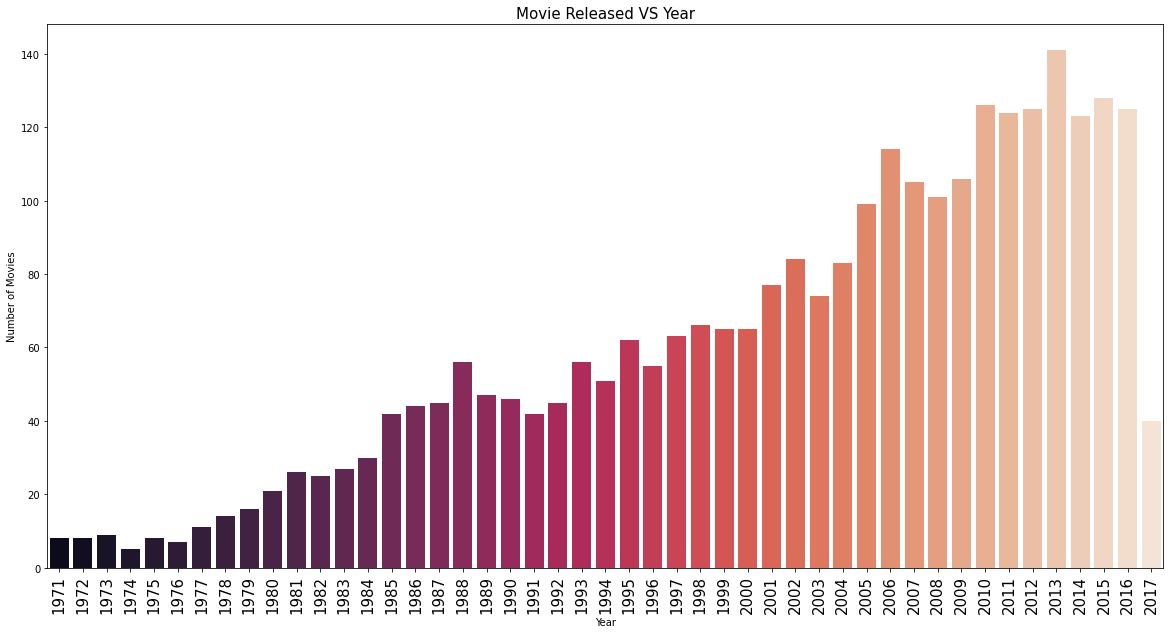

In [32]:
plt.figure(figsize=(20,10))
sns.countplot(x='release_year',data=train,palette="rocket")
plt.title("Movie Released VS Year",fontsize=15)
loc, labels = plt.xticks()
plt.xlabel('Year',fontsize = 10)
plt.ylabel('Number of Movies',fontsize = 10)
plt.xticks(fontsize=15,rotation='vertical')
plt.show()

**Movie Released VS Day of week

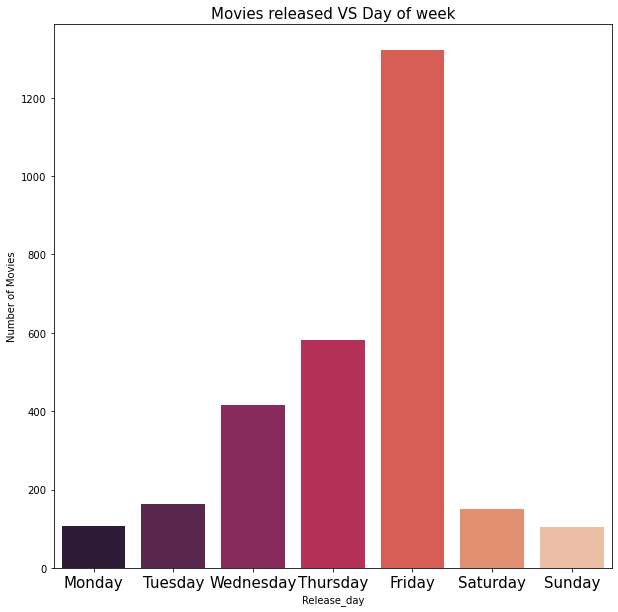

In [33]:
plt.figure(figsize=(10,10))
sns.countplot(x='release_day',data=train,palette="rocket")
loc, labels = plt.xticks()
loc, labels = loc, ['Monday','Tuesday','Wednesday','Thursday',"Friday","Saturday","Sunday"]
plt.xticks(loc, labels,fontsize=15)
plt.xlabel('Release_day',fontsize = 10)
plt.ylabel('Number of Movies',fontsize = 10)
plt.title("Movies released VS Day of week",fontsize=15)
plt.show()

**Revenue VS Budget

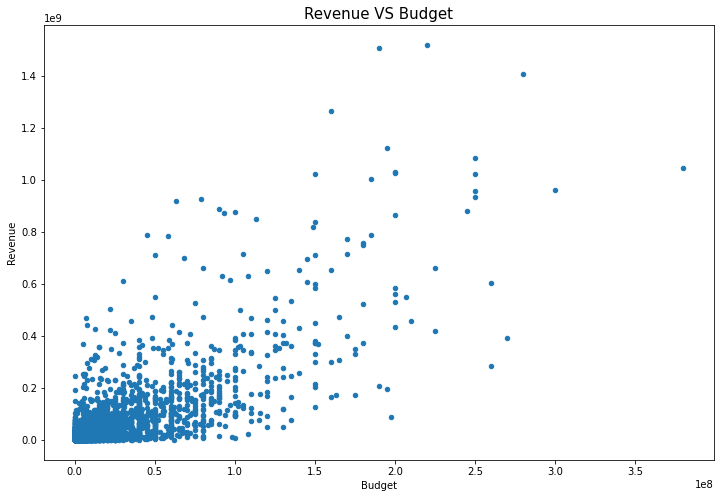

In [34]:
train[['budget','revenue']].plot(kind='scatter',x='budget',y='revenue',figsize=(12,8))
plt.title("Revenue VS Budget",fontsize=15)
plt.xlabel('Budget',fontsize = 10)
plt.ylabel('Revenue',fontsize = 10)
plt.show()

**Revenue of movies VS Status

<Figure size 720x360 with 0 Axes>

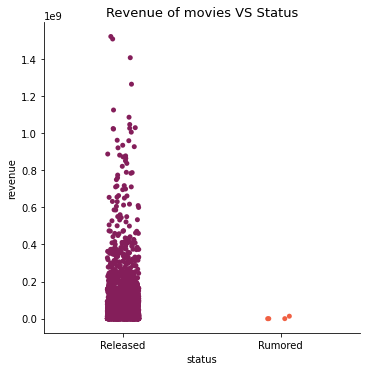

In [35]:
plt.figure(figsize=(10,5))
sns.catplot(x='status', y='revenue', data=train,palette='rocket')
plt.title('Revenue of movies VS Status',fontsize=13);
plt.show()

In [36]:
train.describe()

,id,budget,homepage,overview,popularity,poster_path,runtime,tagline,revenue,popularity2,...,release_year,release_month,release_day,numberofgenres,lang_english,bud_runtime,bud_year,bud_popularity,runtime_year,popularity_year
count,2840.000000,2.840000e+03,2840.000000,2840.000000,2840.000000,2840.000000,2840.000000,2840.000000,2.840000e+03,2726.000000,...,2840.000000,2840.000000,2840.000000,2840.000000,2840.000000,2.840000e+03,2840.000000,2.840000e+03,2840.000000,2840.000000
mean,1499.569014,2.374878e+07,0.332042,0.997183,8.573721,0.999648,107.309054,0.796831,6.948397e+07,8.118789,...,2002.297535,6.742958,3.305634,2.502113,0.855634,2.201377e+05,11836.425060,2.391353e+06,0.054065,0.004775
std,868.290215,3.774326e+07,0.471029,0.053009,12.390547,0.018765,21.249041,0.402428,1.406456e+08,5.015623,...,10.802619,3.400079,1.276044,1.117599,0.351523,4.211415e+05,18779.709030,4.253962e+06,0.010598,0.006147
min,1.000000,0.000000e+00,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000,1.000000e+00,0.600000,...,1971.000000,1.000000,0.000000,0.000000,0.000000,5.291005e-03,0.000496,2.598444e-02,0.000496,0.000500
25%,752.750000,0.000000e+00,0.000000,1.000000,4.133600,1.000000,94.000000,1.000000,2.458063e+06,5.151500,...,1995.000000,4.000000,3.000000,2.000000,1.000000,1.190476e-02,0.000504,7.030674e-01,0.047619,0.002564
50%,1500.500000,9.550000e+06,0.000000,1.000000,7.428286,1.000000,104.000000,1.000000,1.797028e+07,7.549500,...,2005.000000,7.000000,4.000000,2.000000,1.000000,8.910892e+04,4742.961828,1.134663e+06,0.052369,0.004215
75%,2255.250000,3.000000e+07,1.000000,1.000000,10.940463,1.000000,117.000000,1.000000,7.319676e+07,10.050250,...,2011.000000,10.000000,4.000000,3.000000,1.000000,2.806687e+05,14977.534199,3.306451e+06,0.059028,0.005956
max,3000.000000,3.800000e+08,1.000000,1.000000,294.337037,1.000000,338.000000,1.000000,1.519558e+09,45.153000,...,2017.000000,12.000000,6.000000,7.000000,1.000000,1.100000e+07,188866.799702,1.124231e+08,0.168573,0.146351


**Dropping down the columns

In [18]:
train = train.drop(['belongs_to_collection','genres','production_companies','nameofcollection','imdb_id','overview','poster_path','tagline','original_title','original_language','release_date','language','production_countries','cast','spoken_languages',
                    'Keywords', 'status','genres_info','production_company','production_country','title','crew','popularity2'], axis=1)

test = test.drop(['belongs_to_collection','genres','production_companies','nameofcollection','imdb_id','overview','poster_path','tagline','original_title','original_language','release_date','language','production_countries','cast','spoken_languages',
                    'Keywords', 'status','genres_info','production_company','production_country','title','crew','popularity2'], axis=1)


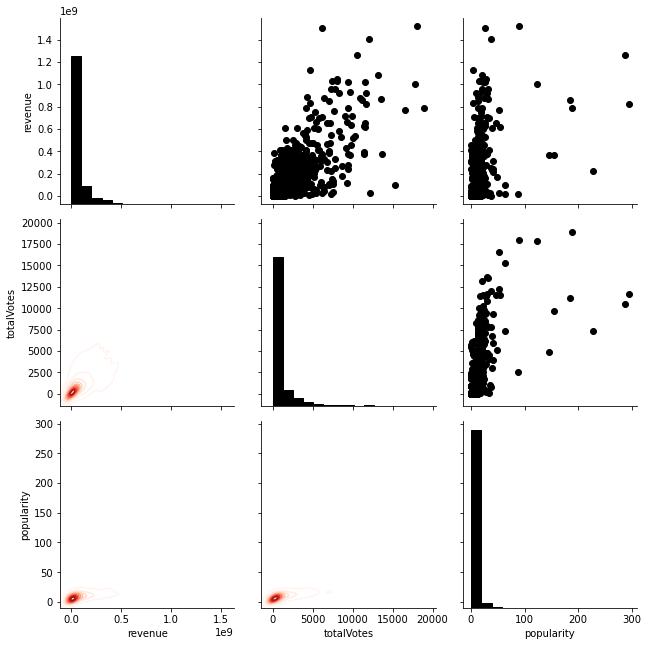

In [38]:
gridpl = sns.PairGrid(data= train,vars = ['revenue', 'totalVotes', 'popularity'], size = 3)

gridpl = gridpl.map_upper(plt.scatter, color = 'black')
gridpl = gridpl.map_diag(plt.hist, bins = 15, color = 'black', edgecolor = 'k')
gridpl = gridpl.map_lower(sns.kdeplot, cmap = 'Reds')


**Taking the log values of "Budget" and "Revenue" in the train section and "Budget" in the test section as they were skewed and not normally distributed

In [19]:
test['budget']=np.log1p(test['budget'])
train['budget']=np.log1p(train['budget'])

train['revenue']=np.log1p(train['revenue'])

In [40]:
train.head()

,id,budget,homepage,popularity,runtime,revenue,rating,totalVotes,release_year,release_month,release_day,numberofgenres,lang_english,bud_runtime,bud_year,bud_popularity,runtime_year,popularity_year
0,1,16.454568,0,6.575393,93.0,16.326300,5.000000,482.0,2015,2,4,1,1,148936.180851,6944.444940,1.848089e+06,0.046627,0.003758
1,2,17.504390,0,8.248895,113.0,18.370959,6.400000,1528.0,2004,8,4,4,1,350877.201754,19950.125187,4.324841e+06,0.056858,0.004613
2,3,15.009433,1,64.299990,105.0,16.387512,8.400000,7314.0,2014,10,4,1,1,31132.084906,1637.717618,5.053601e+04,0.052605,0.032407
3,4,13.997833,1,3.174936,122.0,16.588099,7.500000,115.0,2012,3,4,2,0,9756.105691,596.125683,2.874298e+05,0.061103,0.002074
4,5,0.000000,0,1.148070,118.0,15.182615,6.366308,934.0,2009,2,3,2,0,0.008403,0.000498,4.655342e-01,0.059204,0.001069


In [41]:
test.head()

,id,budget,homepage,popularity,runtime,rating,totalVotes,release_year,release_month,release_day,numberofgenres,lang_english,bud_runtime,bud_year,bud_popularity,runtime_year,popularity_year
0,3001,0.000000,1,3.851534,90.0,6.6,91.0,2007.0,7.0,5.0,1.0,0,0.010989,0.000498,0.206120,0.045319,0.002416
1,3002,11.385103,0,3.559789,65.0,4.5,51.0,2058.0,5.0,6.0,4.0,1,1333.348485,42.739679,19299.357931,0.032054,0.002215
2,3003,0.000000,0,8.085194,100.0,6.1,176.0,1997.0,5.0,4.0,1.0,1,0.009901,0.000501,0.110069,0.050551,0.004547
3,3004,15.732433,1,8.596012,130.0,8.0,937.0,2010.0,9.0,5.0,2.0,0,51908.404580,3381.402785,708627.813304,0.065142,0.004772
4,3005,14.508658,0,3.217680,92.0,6.8,50.0,2005.0,2.0,4.0,2.0,1,21505.387097,997.009472,474194.580907,0.046361,0.002103


**Checking the correlation of the variables with the target variable "Revenue"

In [42]:
train.corr().revenue

id                 0.012539
budget             0.537718
homepage           0.135583
popularity         0.290395
runtime            0.212543
revenue            1.000000
rating             0.134218
totalVotes         0.410851
release_year      -0.056826
release_month      0.033193
release_day       -0.074551
numberofgenres     0.195010
lang_english       0.192291
bud_runtime        0.381996
bud_year           0.502566
bud_popularity     0.351475
runtime_year       0.214051
popularity_year    0.291721
Name: revenue, dtype: float64

**MODELLING

In [22]:
y = train.pop('revenue').values
X = train.values

**Splitting the data in 80:20 (Train and Validation)

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val= train_test_split(X,y,test_size=0.2,random_state=39)

In [24]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((2272, 17), (568, 17), (2272,), (568,))

**LinearRegression

In [25]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
lr_pred=lr_model.predict(X_val)

In [26]:
lr_rmse= mean_squared_error(y_val, lr_pred, squared=False)
lr_rmse

2.3476336671626203

In [20]:
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,budget,homepage,popularity,runtime,revenue,rating,totalVotes,release_year,release_month,release_day,numberofgenres,lang_english,bud_runtime,bud_year,bud_popularity,runtime_year,popularity_year
id,1.000000,0.012868,-0.008170,-0.006635,0.015811,0.012539,-0.011004,-0.013265,-0.016391,0.012241,-0.009644,0.010604,0.001205,0.013554,0.019269,0.023232,0.016368,-0.006610
budget,0.012868,1.000000,0.166281,0.216239,0.199702,0.537718,0.011784,0.293954,0.103845,0.043785,-0.081413,0.193528,0.168814,0.400926,0.496779,0.423807,0.196968,0.216844
homepage,-0.008170,0.166281,1.000000,0.161585,0.061290,0.135583,0.108453,0.299594,0.406306,-0.011791,-0.089202,0.007031,0.032202,0.153826,0.233786,0.114101,0.050202,0.160491
popularity,-0.006635,0.216239,0.161585,1.000000,0.141048,0.290395,0.167659,0.559314,0.116738,-0.008248,-0.105783,0.087595,0.126520,0.222532,0.341384,0.016220,0.137656,0.999987
runtime,0.015811,0.199702,0.061290,0.141048,1.000000,0.212543,0.309434,0.218966,0.028232,0.129322,-0.062833,0.054458,-0.113789,-0.010522,0.263282,0.158730,0.999603,0.141486
revenue,0.012539,0.537718,0.135583,0.290395,0.212543,1.000000,0.134218,0.410851,-0.056826,0.033193,-0.074551,0.195010,0.192291,0.381996,0.502566,0.351475,0.214051,0.291721
rating,-0.011004,0.011784,0.108453,0.167659,0.309434,0.134218,1.000000,0.327992,-0.012350,0.108070,-0.053557,-0.040847,-0.134275,-0.036025,0.019006,-0.087499,0.310113,0.168544
totalVotes,-0.013265,0.293954,0.299594,0.559314,0.218966,0.410851,0.327992,1.000000,0.157692,0.030602,-0.157498,0.118601,0.146706,0.390613,0.579022,0.251877,0.214422,0.559883
release_year,-0.016391,0.103845,0.406306,0.116738,0.028232,-0.056826,-0.012350,0.157692,1.000000,-0.059667,-0.081112,-0.078841,-0.166873,0.160053,0.181964,0.106605,0.000560,0.113045
release_month,0.012241,0.043785,-0.011791,-0.008248,0.129322,0.033193,0.108070,0.030602,-0.059667,1.000000,-0.016066,-0.013854,0.002538,0.040634,0.036651,0.017860,0.131293,-0.007818


Fitting the entire dataset on the model

In [27]:
lr_model.fit(X,y)
lr_pred_full = lr_model.predict(test)
lr_pred_full = np.exp(lr_pred_full)
rand_lr = pd.DataFrame(lr_pred_full)

linear_regression = pd.concat([test["id"],rand_lr], axis =1)
linear_regression.columns = ['id', 'revenue']
linear_regression.to_csv(r'linear_regression.csv',index = False)


In [28]:
reg = LinearRegression().fit(X, y)
for i,j in zip(reg.coef_, train.columns):
    print(i,j)

1.5302269754009898e-05 id
0.1332246276237459 budget
0.22900502365071518 homepage
-8.270787584120631 popularity
1.230744852875239 runtime
0.20839146367033282 rating
0.00013013557621350028 totalVotes
-0.07694133296243666 release_year
-0.01583011013013448 release_month
0.014079824234795748 release_day
0.07737247402248726 numberofgenres
0.3854409048736154 lang_english
4.895782363025641e-07 bud_runtime
2.4216018715789345e-05 bud_year
3.671351885017106e-08 bud_popularity
-2454.516773004676 runtime_year
16710.57973272263 popularity_year


In [29]:
import statsmodels.api as ssm
X=ssm.add_constant(X)        
model= ssm.OLS(y,X).fit()        
predictions= model.summary()      
predictions

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     128.6
Date:                Sun, 02 May 2021   Prob (F-statistic):               0.00
Time:                        21:48:02   Log-Likelihood:                -6352.2
No. Observations:                2840   AIC:                         1.274e+04
Df Residuals:                    2822   BIC:                         1.285e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        157.7548     43.103      3.660      0.000      73.237     242.272
x1           1.53e-05   4.92e-05      0.311      0.756   -8.11e-05       0.000
x2             0.1332      0.007     19.020      0.000       0.119       0.147
x3             0.2290      0.104      2.211      0.027       0.026       0.432
x4            -8.2708      1.074     -7.698      0.000     -10.378      -6.164
x5             1.2307      0.394      3.125      0.002       0.458       2.003
x6             0.2084      0.059      3.560      0.000       0.094       0.323
x7             0.0001   3.69e-05      3.525      0.000    5.78e-05       0.000
x8            -0.0769      0.021     -3.606      0.000      -0.119      -0.035
x9            -0.0158      0.013     -1.240      0.215      -0.041       0.009
x10            0.0141      0.034      0.413      0.679      -0.053       0.081
x11            0.0774      0.040      1.935      0.053      -0.001       0.156
x12            0.3854      0.134      2.886      0.004       0.124       0.647
x13         4.896e-07   1.58e-07      3.106      0.002     1.8e-07    7.99e-07
x14         2.422e-05   4.82e-06      5.029      0.000    1.48e-05    3.37e-05
x15         3.671e-08   1.45e-08      2.530      0.011    8.26e-09    6.52e-08
x16        -2454.5168    789.211     -3.110      0.002   -4002.005    -907.028
x17         1.671e+04   2166.691      7.712      0.000    1.25e+04     2.1e+04
==============================================================================
Omnibus:                     1084.391   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5569.247
Skew:                          -1.755   Prob(JB):                         0.00
Kurtosis:                       8.895   Cond. No.                     2.49e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**RandomForestRegressor

In [49]:
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor(random_state=42, 
                                  max_features='auto', 
                                  n_estimators= 50, 
                                  min_samples_leaf=2)
rfr_model.fit(X_train,y_train)
rfr_pred = rfr_model.predict(X_val)

In [50]:
rfr_rmse= mean_squared_error(y_val, rfr_pred, squared=False)
rfr_rmse

2.0450774420898874

Fitting the entire dataset on the model

In [51]:
rfr_model.fit(X,y)
rfr_pred_full = rfr_model.predict(test)
rfr_pred_full = np.exp(rfr_pred_full)
rand_rf = pd.DataFrame(rfr_pred_full)

random_forest = pd.concat([test["id"],rand_rf], axis =1)
random_forest.columns = ['id', 'revenue']
random_forest.to_csv(r'random_forest.csv',index = False)


**XGBoost

In [79]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective = 'reg:linear',
                                  eta = 0.01,
                                  max_depth = 3,
                                  min_child_weight = 3,
                                  subsample = 0.8,
                                  gamma = 1.45,
                                  colsample_bytree = 0.7,
                                  eval_metric = 'rmse',
                                  seed = 42,
                                  n_estimators = 3000)

In [80]:
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_val)
xgb_rmse= mean_squared_error(y_val, xgb_pred, squared=False)
xgb_rmse

[20:56:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


1.9525226053155942

**Hyperparameter Tuning - GRID Search

In [65]:
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBRegressor


xgb = XGBRegressor()
parameters = {
              'objective':['reg:linear'],
              'eta': [0.01, 0.03, 0.05, 0.07], 
              'max_depth': [3, 5, 6, 7],
              'min_child_weight': [3, 4, 5],
              'subsample': [0.6, 0.7, 0.8],
              'colsample_bytree': [0.5, 0.6, 0.7],
              'eval_metric': ['rmse'],
              'n_estimators': [1000,2000,3000,3500] }

xgb_grid = GridSearchCV(xgb,parameters,cv = 2,n_jobs = 5,verbose=True)

xgb_grid.fit(X,y)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 1728 candidates, totalling 3456 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  1.2min
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  8.4min
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed: 20.8min
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed: 39.6min
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed: 60.4min
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed: 93.0min
[Parallel(n_jobs=5)]: Done 2440 tasks      | elapsed: 126.9min
[Parallel(n_jobs=5)]: Done 3190 tasks      | elapsed: 181.2min
[Parallel(n_jobs=5)]: Done 3456 out of 3456 | elapsed: 198.2min finished


[20:29:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
0.595777410827351
{'colsample_bytree': 0.5, 'eta': 0.01, 'eval_metric': 'rmse', 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 1000, 'objective': 'reg:linear', 'subsample': 0.7}


Fitting the entire dataset on the model

In [54]:
xgb_model.fit(X, y)
xgb_pred_full = xgb_model.predict(test)
xgb_pred_full = np.exp(xgb_pred_full)
rand_xgb = pd.DataFrame(xgb_pred_full)

xgb = pd.concat([test["id"],rand_xgb], axis =1)
xgb.columns =['id', 'revenue']
xgb.to_csv(r'xgb.csv',index = False)

[16:43:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


**LightBGM

In [55]:
import lightgbm as lgb
lgb_model = lgb.LGBMRegressor(objective='regression',num_leaves=1023,
                              learning_rate=0.005, n_estimators=650,
                              max_bin=58, bagging_fraction=0.80,max_depth=10,
                              bagging_freq=5, feature_fraction=0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf=7, min_sum_hessian_in_leaf=11)


In [56]:
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_val)
lgb_rmse= mean_squared_error(y_val, lgb_pred, squared=False)
lgb_rmse

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=7, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


2.0499625435308815

Fitting the entire dataset on the model

In [57]:
lgb_model.fit(X, y)
lgb_pred_full = lgb_model.predict(test)
lgb_pred_full = np.exp(lgb_pred_full)
rand_lgb = pd.DataFrame(lgb_pred_full)

lgb = pd.concat([test["id"],rand_lgb], axis =1)
lgb.columns =['id', 'revenue']
lgb.to_csv(r'lgb.csv',index = False)


[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=7, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
